In [1]:
# импортируем необходимые библиотеки и функции для выполнения работы

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score




In [145]:
# посмотрим на данные. Выгрузим первые 5 строк. 
data = pd.read_csv("/datasets/Churn.csv")

In [146]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [147]:
# посмотрим на структуру данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [148]:
data['Tenure'].value_counts().sort_values(ascending=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Большинство клиентов являются клиентами 1 год, но до 7 лет количество клиентов находится в близком диапозоне значений с количество клиентов банка 1 год. 

In [149]:
# посмотрим на пропущенные значения
data['Tenure'].isna().sum()

909

Мы получили достаточно большое значение клиентов с пропущенными значениями в колонке Tenure. 

In [150]:
# посмотрим на клиентов с отсутствующими значениям в Tenure
data_Tenure_nan = data[data.isnull().any(axis=1)]
data_Tenure_nan

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [151]:
# наличие кредитной карты
data_Tenure_nan['HasCrCard'].describe()

count    909.000000
mean       0.710671
std        0.453701
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: HasCrCard, dtype: float64

In [152]:
# кредитный рейтинг
data_Tenure_nan['CreditScore'].describe()

count    909.000000
mean     648.451045
std       99.079381
min      359.000000
25%      580.000000
50%      647.000000
75%      718.000000
max      850.000000
Name: CreditScore, dtype: float64

In [153]:
# страна проживания
data_Tenure_nan.groupby('Geography').agg({'Age':'count'})

,Age
Geography,
France,464
Germany,216
Spain,229


In [154]:
# факт ухода
data_Tenure_nan.groupby('Exited').agg({'Age':'count'})

,Age
Exited,
0,726
1,183


In [155]:
# посмотрим возрастную категорию среди отсутствующих значений
data_Tenure_nan.Age.value_counts().head(20)

36    55
38    53
40    49
31    45
32    44
37    43
35    43
33    39
39    36
34    35
29    35
43    32
30    31
41    28
28    26
44    24
42    24
45    22
26    18
49    14
Name: Age, dtype: int64

In [156]:
data.Tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [157]:
# сделаем замену
data['Tenure'] = data['Tenure'].fillna(100)

In [158]:
# ещё раз посмотрим на структуру
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Отлично, теперь у нас нет пропущенных значений в данных

In [159]:
# посмотрим на географию проживания на всем наборе данных


data.groupby('Geography').agg({'Age':'count'})

,Age
Geography,
France,5014
Germany,2509
Spain,2477


Как и в нашей выборке в общем наборе данных Франция занимает первое место. 

In [160]:
# посмотрим на распределение клиентов по полу
data.groupby('Gender').aggregate({'Age':'count'})

,Age
Gender,
Female,4543
Male,5457


Среди клиентов банка больше мужчин

In [161]:
data.pivot_table(values = ['Balance', 'EstimatedSalary'], index = 'Gender', aggfunc = ['mean', 'median'])

mean                    median                
             Balance EstimatedSalary   Balance EstimatedSalary
Gender                                                        
Female  75659.369139   100601.541382  96147.55       101905.34
Male    77173.974506    99664.576931  98064.97        98060.51

Можно увидеть, что среди женщин и мужчин примерно одинаковые показатели по балансу на счете и предполагаемой заработной плане

In [162]:
data['Age'].value_counts().sort_values(ascending = False).head(10)

37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: Age, dtype: int64

In [163]:
data['Age'].value_counts().sort_values(ascending = False).head(10).sum()

4451

Мы получили интересное наблюдение. В банке среди клиентов преобладают клиенты в возрасте от 31 года до 40 лет. При этом количество данных клиентов составляет 4451, что составляет более 44% (4451/10000)

In [164]:
data.query("Age >= 31 and Age <41").groupby("Exited").agg({"Age":"count"})

,Age
Exited,
0,3913
1,538


Можно сделать вывод, что в данной группе преобладают клиенты с отсутствием факта ухода. 

In [165]:
# посмотрим на аналогичный показатель по всему набору данных

data.groupby("Exited").agg({"Age":"count"})

,Age
Exited,
0,7963
1,2037


Количество клиентов по всему набору данных, которые уходят достаточно много. Это около 26%. Банку явно нужно искать причину такого действия. 

In [166]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


После проведенного анализа статистики нам необходимо рассмотреть визуализацию данных, так как график нам также может подсказать необходимые пропорции, которые мы могли первона

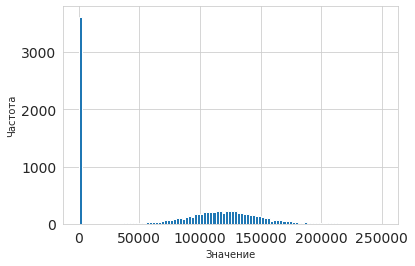

In [167]:
# визуализируем баланс у клиентов

sns.set_style('whitegrid')
fig, ax = plt.subplots()
data['Balance'].hist(ax = ax, bins = 100)
#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Значение')
ax.set_ylabel("Частота");

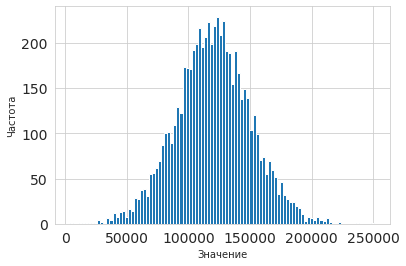

In [212]:
# посмотрим на значения Balance больше нуля

sns.set_style('whitegrid')
fig, ax = plt.subplots()
data.query("Balance > 0")['Balance'].hist(ax = ax, bins = 100)
#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Значение')
ax.set_ylabel("Частота");

График хорошо ложится в нормальное распределение. По графику можно увидеть, что примерно 64.8% значений находится в диапозоне от 100 000 до 150 000 

In [214]:
data.query("Balance > 0")['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

Среднее и медиана практически совпадают. В Балансе при ненулевых значениях практически отстутствуют выбросы. С одной стороны это хорошо. С другой стороны мы можем судить, что у банк работает со стандартными продуктовыми решениями, которые могут подходить большинству клиентов. Один из вариантов для улучшения показателей, это попробовать создать (в случае отсутствия) Premium подразделение для состоятельных клиентов. Также здесь можно расширить линейку инвестиционных продуктов (это требует более детального анализа действующих продуктовых решений). Как одно из предположений может  являться , то, что у банка могут быть не столь развиты маржинальные продукты. В любом случае банку стоит задуматься о создании дополнительного подразделения с целью увеличения более состоятельных клиентов или попробовать организвать агентскую сеть по продаже качественных продуктовых решений предлагаемых другими инвестиционными компаниями. Это позволить поднять маржинальность, а также расширение предлагаемой линейки продуктов. Быть может, определенный отток клиентов также связан с недостаточностью предлагаемых услуг (которые есть у конкурентов). 

In [168]:
data.query("Balance == 0").groupby('Exited').agg({"Balance":"count"})

,Balance
Exited,
0,3117
1,500


Мы можем отметить, что в банке достаточно высокое количество клиентов не имеющих баланс. При этом факт ухода клиента отсутствует. 
Здесь можно сделать вывод о том, что присутсвует определенная высокая неэффективность, так как либо с данными клиентами не работают менеджеры, либо это большое количество клиентов, когда-то октрыло счет в банке, но по какой-то причине передумали класть деньги в банк. 


Дополнительно стоит отметить, что данные параметр может вносить путаницу для прогнозирования нашей модели, так как модель может ошибочно посчитать по данному признаку, что если баланс равен нулю, то нужно отнести клиента к группе 0 (отсутствие факта ухода)

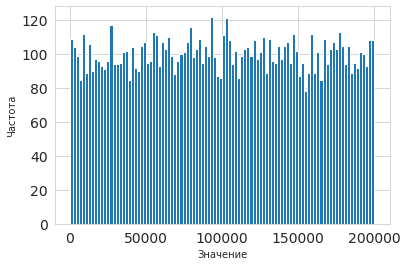

In [169]:
# визуализируем Предпалагаемую зарплату у клиентов

sns.set_style('whitegrid')
fig, ax = plt.subplots()
data['EstimatedSalary'].hist(ax = ax, bins = 100)
#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Значение')
ax.set_ylabel("Частота");

Предпологаемая зарплата мало что нам говорит о клиентах банка, кроме того, что она имеет ширококий диапозон и у банка нет жестко сегментированной клиентуры. 

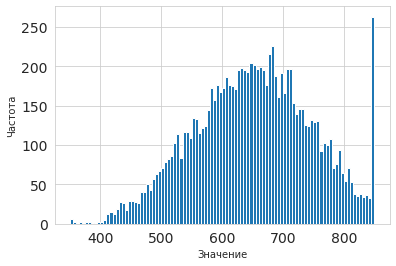

In [170]:

# визуализируем Предпалагаемый кредитный рейтинг у клиентов

sns.set_style('whitegrid')
fig, ax = plt.subplots()
data['CreditScore'].hist(ax = ax, bins = 100)
#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Значение')
ax.set_ylabel("Частота");



Кредитный рейтинг имеет явные выбросы, при этом с высоким количеством. Быть может банк пошел на эту меру в более сложные экономические периоды, так как наблюдался отток клиентов и пришлось выдавать кредиты(например на ипотеку) с меньшим кредитным рейтингом. В этих условиях банку стоит задуматься в будущей на проработку большего количества предложений для клиентов. Тем самым большое количество купленных продуктов и услуги будут более значительно задерживать клиента в банке. Стоит задуматься над внедрением маржинальных продуктов (инвестиционных, страховых). Также, как было уже сказано выше, банку стоит рассмотреть премиум направление. Это позволит улучшить клиентскую базу, маржинальность и возможно статус банка, даже в лице простых клиентов.

In [171]:
# удалим столбцы RowNumber, CustomerId, которые не понадобятся для обучения
data = data.drop(['RowNumber', 'CustomerId', "Surname"], axis = 1)


In [172]:
# приведём значения столбцов в единый стандарт
data.columns = [x.lower().replace(' ', '_') for x in data.columns.values]
data.head(5)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Вывод :** Рассмотрена параметры набора данных. Присутствует явный перекос значений в столбцу Exited. Это логично, так как при равном количестве или большем в сторону ухода клиентво банк вероятно уже был дефолтным. Здесь мы наблюдаем высокое значение показателя в связи с которым видно, что высокая доля клиентов уходит. 


Показатели Баланса на счёт говорят о том, что данные распределены нормально, но присутствуют выбросы в сторону нулевого значения. Для более подробной оценки необходимо видеть состояние переводов, а также статус клиента (зарплатный счёт, счёт для переводов за границу, счёт для покупок в интернете.). В такой ситуации нулевые значения на балансе можно было бы объяснить гораздо подробнее. 

Диапозон предпалагаемой зарплаты находится в широком размахе значений. Это также говорит о том, что у нас нет жесткой сегментации клиентов, то есть банк не нацелен на премиум сигемент или же наоборот на широкую розницу. Клиентами банка является широкая группа клиентов. 

Наибольшее колиестов клиентов из Франции. Германия и Испания распределены примерно поровну. 


Клиенты в возрасте от 31 до 40 лет занимают значительную долю среди всех клиентов банка. Это хороший показатель с точки зрения того, что клиенты банка достаточно молодые люди. С другой стороны необходимо смотреть насколько хорошо они удовлетворены услугами, так как может присутствовать ситуация, что данная возрастная группа может более спокойно переходить из банка в банк. Таким образом банку следует также обратить на это внимание для исследования и возможных мер с качественным удержанием клиентов. 

## Исследование задачи

In [173]:
# рассмотрим баланс значений в наборе данных в зависимости от столбца exited

data.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Можно заметить, что при обучении модели будет присутствовать дисбаланс класса. 

In [174]:
# произведём необходимое преобразование категориальных данных и сделаем Стандартизацию количественных 
# данных


data_ohe = pd.get_dummies(data, drop_first=True)

train_valid, test = train_test_split(data_ohe, test_size=0.2)
train, valid = train_test_split(train_valid, test_size=0.25)
features_train = train.drop(['exited'], axis=1)
target_train = train['exited']
features_valid = valid.drop(['exited'], axis=1)
target_valid = valid['exited']
features_test = test.drop(['exited'], axis=1)
target_test = test['exited']

numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [175]:
# проверим размер

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)
(6000,)
(2000,)
(2000,)


In [176]:
# обучим модель 
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

DecisionTreeClassifier(random_state=12345)

In [177]:
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

In [178]:
print(accuracy_valid)

0.789


In [179]:
# проверка адекватности модели
target = data['exited']
features = data.drop('exited', axis=1)

target_pred_constant = pd.Series([0]*len(target))
print(accuracy_score(target, target_pred_constant))

0.7963


В нашей задаче наблюдается сильный дисбаланс классов , что плохо сказывается на обучении модели.

In [180]:
# посчитаем матрицу ошибок

print(confusion_matrix(target_valid, predicted_valid))

[[1370  217]
 [ 205  208]]


In [181]:
# посмотрим на полноту
print(recall_score(target_valid, predicted_valid))


0.5036319612590799


Доля правильных ответов составляет 0.55

In [182]:
print(precision_score(target_valid, predicted_valid))


0.4894117647058824


точность составляет 0.48


In [183]:
# рассмотрим показатель метрики f1
print(f1_score(target_valid, predicted_valid))

0.49642004773269693


In [184]:
probabilities_valid_dtree = model.predict_proba(features_valid)
probabilities_one_valid_dtree = probabilities_valid_dtree[:, 1]

auc_roc_dtree = roc_auc_score(target_valid, probabilities_one_valid_dtree)
print(auc_roc_dtree)

0.6834479907114555


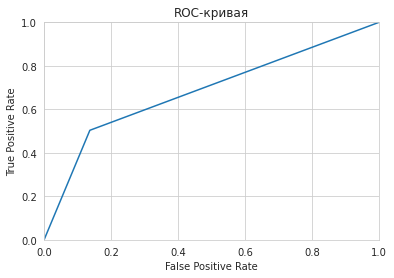

In [185]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_dtree) 

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()



Показатели модели не самые лучшие. Требуется улучшение.

модель показывает хорошие результаты, но мы не учитывали дисбаланс классов. 

In [186]:
# напишем функцию и проведем перемешивание
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)


In [187]:
# обучим модель и посмотрим на значения DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=12345).fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5148279952550415


F1 показывает 0.51. Значение является более худшим по сравнению с тем, которое требуется для выполнения задачи. 

0.69560411393419


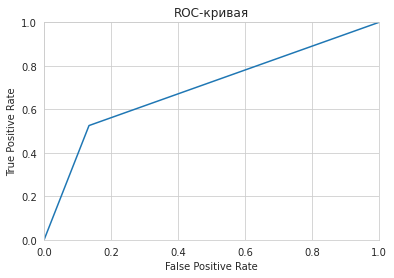

In [188]:

# напишем функцию для ROC-кривой

def auc_roc_plot(features_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    print(auc_roc)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

    
auc_roc_plot(features_valid)
    
    





Модель требует улучшения

In [189]:
# обучим модель и посмотрим на значения LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear').fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5330535152151102


Результаты работы отстают от поставленных целей

0.7880661732508839


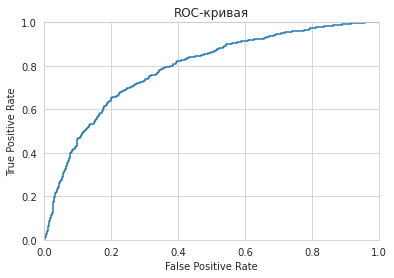

In [190]:
def auc_roc_plot(features_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    print(auc_roc)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

    
auc_roc_plot(features_valid)

Используем GridSearch для подбора наилучших гиперпараметров для LogisticRegression и DecisionTreeClassifier

In [192]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_lr_gr = GridSearchCV(model, param_grid=grid_values)

In [193]:
grid_search = GridSearchCV(LogisticRegression(), param_grid=grid_values, cv=5)

In [194]:
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [195]:
print("Наилучшие показатели параметров : {}".format(grid_search.best_params_))

Наилучшие показатели параметров : {'C': 100, 'penalty': 'l2'}


In [196]:
predicted_valid_lr_gr = grid_search.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_lr_gr))

F1: 0.5324947589098533


Результат меньше, чем необходимое значение в 0.59

0.7880661732508839


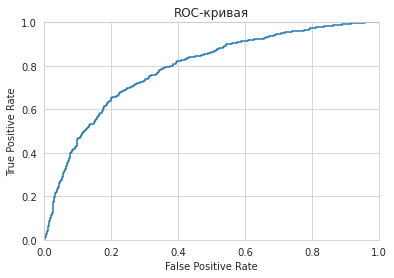

In [197]:
def auc_roc_plot(features_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    print(auc_roc)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

    
auc_roc_plot(features_valid)

Результат требует улучшения

In [ ]:
#

In [198]:
# применим GridSearch 

# tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
# model = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)


In [ ]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2, 4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 250, 300]}
model = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10)

In [199]:
model.fit(features_upsampled, target_upsampled)
predicted_valid_gr_tree = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_gr_tree))

F1: 0.49763033175355453


0.6847692587015262


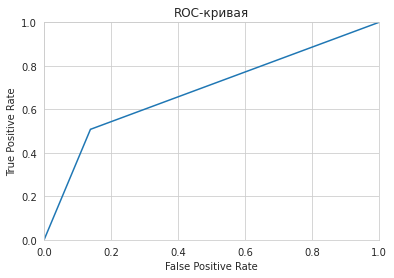

In [200]:
def auc_roc_plot(features_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    print(auc_roc)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

    
auc_roc_plot(features_valid)

Результат неудовлетворительный

Результат хуже, чем необходимый

In [201]:
#  обучим модель RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, max_depth = 20, random_state=12345)
model_rf.fit(features_upsampled, target_upsampled)
predicted_value_rf = model_rf.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_value_rf))

F1: 0.6191117092866757




Посмотрим на наилучшее значение F1 при разных показателях гиперпараметра max_depth

In [202]:
for i in [5, 10, 20, 50, 100, 120, 150, 200, 250]:
    model_rf = RandomForestClassifier(n_estimators=1000, max_depth = i, random_state=12345)
    print('max_depth = ', i)
    model_rf.fit(features_upsampled, target_upsampled)
    predicted_value_rf = model_rf.predict(features_valid)
    print("F1:", f1_score(target_valid, predicted_value_rf))

max_depth =  5
F1: 0.5940119760479042
max_depth =  10
F1: 0.6336154776299878
max_depth =  20
F1: 0.6191117092866757
max_depth =  50
F1: 0.6129032258064516
max_depth =  100
F1: 0.6129032258064516
max_depth =  120
F1: 0.6129032258064516
max_depth =  150
F1: 0.6129032258064516


В результате мы получили лучшие значения на первоначально обученной модели с значением max_depth равным 10. Вновь обучим модель с целью дальнейшего тестирования данных уже на тестовом наборе данных

In [203]:
model_rf = RandomForestClassifier(n_estimators=1000, max_depth = 10, random_state=12345)
model_rf.fit(features_upsampled, target_upsampled)
predicted_value_rf = model_rf.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_value_rf))

F1: 0.6336154776299878


In [205]:
# param_grid = {
# 'n_estimators': [1000, 1500],
# 'min_samples_leaf': [1, 5, 10, 20],
# 'max_depth': [20, 50, 100],
# 'max_features': ['auto', 'sqrt'],
# 'bootstrap': [True, False]}


# model_gridsearch = GridSearchCV(
# estimator=model_rf,
# param_grid=param_grid)


# model_gridsearch.fit(features_upsampled, target_upsampled)
# predicted_valid_gr_rf = model_gridsearch.predict(features_valid)
# print("F1:", f1_score(target_valid, predicted_valid_rf))

**Вывод:**
Набор данных был соответствующим образом приведён для дальнейшего обучения выбранных моделей. В результате ряда преобразования набор данных был разделен на обучающиеся данные, валидационные и тестовые. При обучении трех моделей выбрана модель с наилучшими показателями метрики F1. Значение метрики F1 соответствуют более высокому значению, чем 0.59 и можно приступать к тестированию модели. 

## Тестирование модели

In [206]:
predicted_feat_test = model_rf.predict(features_test)

print("F1:", f1_score(target_test, predicted_feat_test))

F1: 0.624263839811543


Реузльтат метрики F1 на тестовой выборке больше, чем требуется (0.59)

Посмотрим на параметры ROC-кривой. Для этого возьмем необходимые функции и сделаем определенные преобразования с прогнозами по модели. 

In [207]:
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8692249832552931


In [208]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 


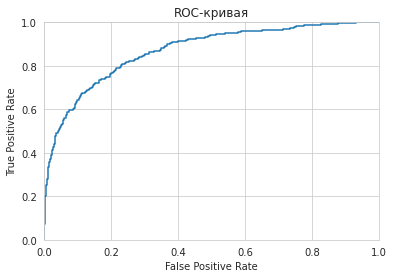

In [209]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Площадь под кривой равна 0.85 и модель явно отличается от случайной модели, так как в противном случае площадь равнялась бы 0.5

**Вывод:**

- Проведено ислледование набора данных по клиентам банка. 

- Произведен подбор алгоритма модели машинного обучения для осуществления необходимых значений метрики F1.

- Проведено тестирование модели на тестовом наборе данных. Результа соответствует поставленным требованиям. 

В ходе работы был исследован набора данных. Произведены необходимые преобразования и обучена лучшая модель для прогноза оттока клиентов. Тестирование модели показало хорошие результаты. В результате у банка будет присутствовать необходимый инструмент для прогноза оттока клиентов. 